In [ ]:
# import kagglehub
# path = kagglehub.dataset_download("snap/amazon-fine-food-reviews")
# print("Path to dataset files:", path)

In [150]:
import nltk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

plt.style.use('ggplot')

In [151]:
def clean_text(text, limit=512):
    cleaned_text = re.sub(r'<.*?>', ' ', text)
    cleaned_text = ' '.join(cleaned_text.split())
    return cleaned_text[:limit]

In [152]:
df = pd.read_csv('Reviews.csv')
df = df.head(1000)
df['Text'] = df['Text'].apply(clean_text)

In [153]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wide...


<Axes: xlabel='Score'>

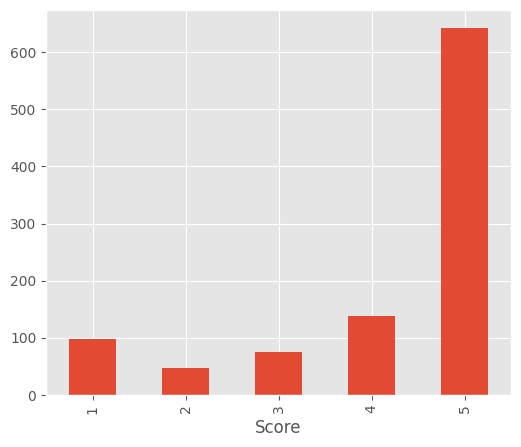

In [154]:
df['Score'].value_counts().sort_index().plot(kind='bar', figsize=(6,5))

In [155]:
nltk.download('punkt_tab')
nltk.download('vader_lexicon')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\PC\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\PC\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [156]:
from nltk.sentiment import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()


In [157]:
polarity_df = pd.DataFrame(columns=['Id', 'Score', 'Negative', 'Neutral', 'Positive', 'Compound'])

In [158]:
for row in df.itertuples():
    text = row.Text
    scores = sia.polarity_scores(text)
    newrow = [row.Id, row.Score, scores['neg'], scores['neu'], scores['pos'], scores['compound']]
    polarity_df = pd.concat([polarity_df, pd.DataFrame([newrow], columns=polarity_df.columns)], axis=0)

C:\Users\PC\AppData\Local\Temp\ipykernel_18328\13154339.py:5: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  polarity_df = pd.concat([polarity_df, pd.DataFrame([newrow], columns=polarity_df.columns)], axis=0)


In [159]:
vaders = polarity_df.merge(df, how='left')
vaders = vaders.set_index('Id')

In [160]:
vaders

,Score,Negative,Neutral,Positive,Compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Time,Summary,Text
Id,,,,,,,,,,,,,
1,5,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
2,1,0.138,0.862,0.000,-0.5664,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
3,4,0.091,0.754,0.155,0.8265,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
4,2,0.000,1.000,0.000,0.0000,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
5,5,0.000,0.552,0.448,0.9468,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,1350777600,Great taffy,Great taffy at a great price. There was a wide...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,5,0.026,0.716,0.257,0.9788,B006F2NYI2,A1D3F6UI1RTXO0,Swopes,1,1,1331856000,Hot & Flavorful,BLACK MARKET HOT SAUCE IS WONDERFUL.... My hus...
997,5,0.000,0.786,0.214,0.9309,B006F2NYI2,AF50D40Y85TV3,Mike A.,1,1,1328140800,Great Hot Sauce and people who run it!,"Man what can i say, this salsa is the bomb!! i..."
998,5,0.000,0.673,0.327,0.9634,B006F2NYI2,A3G313KLWDG3PW,kefka82,1,1,1324252800,this sauce is the shiznit,this sauce is so good with just about anything...


<Axes: xlabel='Score', ylabel='Compound'>

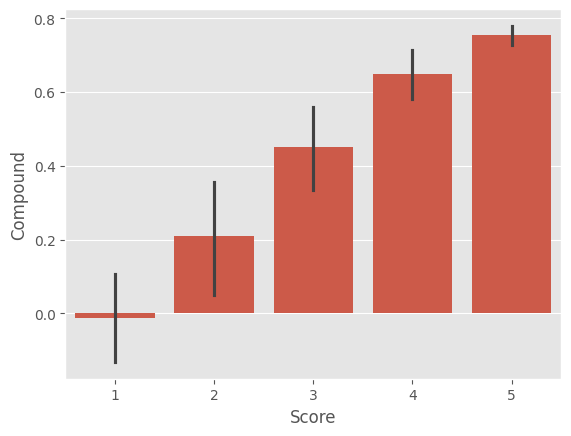

In [161]:
sns.barplot(x='Score', y='Compound', data=vaders)

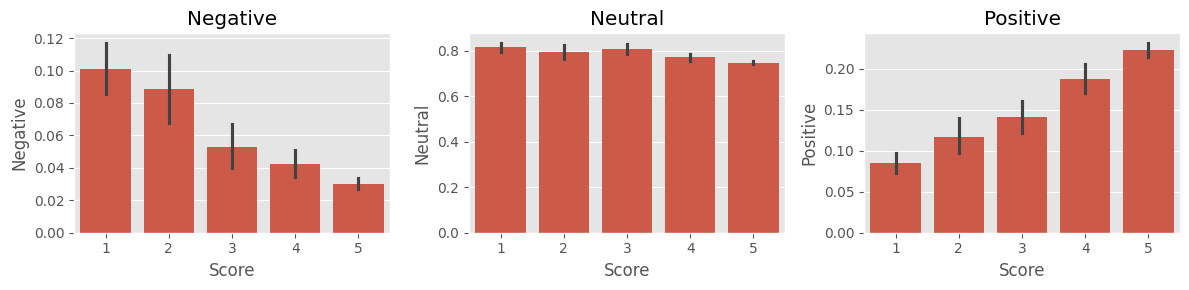

In [162]:
fig, ax = plt.subplots(1, 3, figsize=(12,3))
sns.barplot(x='Score', y='Negative', data=vaders, ax=ax[0])
sns.barplot(x='Score', y='Neutral', data=vaders, ax=ax[1])
sns.barplot(x='Score', y='Positive', data=vaders, ax=ax[2])
ax[0].set_title('Negative')
ax[1].set_title('Neutral')
ax[2].set_title('Positive')
plt.tight_layout()
plt.show()

In [163]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from scipy.special import softmax

In [164]:
Model = f"cardiffnlp/twitter-roberta-base-sentiment-latest"
tokenizer = AutoTokenizer.from_pretrained(Model)
model = AutoModelForSequenceClassification.from_pretrained(Model)

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [165]:
columns = ['Id', 'Score', 'Negative', 'Neutral', 'Positive']
results_list = []
for row in df.itertuples():
    try:
        text = row.Text
        encoded = tokenizer(text, return_tensors='pt', truncation=True)
        output = model(**encoded)
        scores = softmax(output[0][0].detach().numpy())
        newrow = [row.Id, row.Score, scores[0], scores[1], scores[2]]
        results_list.append(newrow)
    except RuntimeError:
        print(f'Broke for id {row.Id}')
roberta_df = pd.DataFrame(results_list, columns=columns)

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


In [166]:
roberta_df.columns = ['Id', 'Score', 'RB_Negative', 'RB_Neutral', 'RB_Positive']
polarity_df.columns = ['Id', 'Score', 'VD_Negative', 'VD_Neutral', 'VD_Positive', 'VD_Compound']

merged_df = pd.merge(roberta_df, polarity_df, on=['Id', 'Score'], how='outer')
merged_df

,Id,Score,RB_Negative,RB_Neutral,RB_Positive,VD_Negative,VD_Neutral,VD_Positive,VD_Compound
0,1,5,0.010395,0.037855,0.951749,0.000,0.695,0.305,0.9441
1,2,1,0.716768,0.271225,0.012007,0.138,0.862,0.000,-0.5664
2,3,4,0.006354,0.112505,0.881141,0.091,0.754,0.155,0.8265
3,4,2,0.002918,0.047332,0.949751,0.000,1.000,0.000,0.0000
4,5,5,0.004213,0.009574,0.986213,0.000,0.552,0.448,0.9468
...,...,...,...,...,...,...,...,...,...
995,996,5,0.003282,0.010770,0.985948,0.026,0.716,0.257,0.9788
996,997,5,0.006731,0.016622,0.976647,0.000,0.786,0.214,0.9309
997,998,5,0.004877,0.022658,0.972465,0.000,0.673,0.327,0.9634
998,999,1,0.814801,0.167554,0.017645,0.063,0.874,0.062,-0.0129


In [169]:
merged_df.iloc[82]

Id                   83
Score                 5
RB_Negative    0.264332
RB_Neutral     0.562121
RB_Positive    0.173547
VD_Negative       0.124
VD_Neutral        0.685
VD_Positive       0.191
VD_Compound      0.7901
Name: 82, dtype: object

In [168]:
df_result = merged_df.merge(df, how='left')
df_result

,Id,Score,RB_Negative,RB_Neutral,RB_Positive,VD_Negative,VD_Neutral,VD_Positive,VD_Compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Time,Summary,Text
0,1,5,0.010395,0.037855,0.951749,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,1,0.716768,0.271225,0.012007,0.138,0.862,0.000,-0.5664,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,4,0.006354,0.112505,0.881141,0.091,0.754,0.155,0.8265,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,2,0.002918,0.047332,0.949751,0.000,1.000,0.000,0.0000,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,5,0.004213,0.009574,0.986213,0.000,0.552,0.448,0.9468,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,1350777600,Great taffy,Great taffy at a great price. There was a wide...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,5,0.003282,0.010770,0.985948,0.026,0.716,0.257,0.9788,B006F2NYI2,A1D3F6UI1RTXO0,Swopes,1,1,1331856000,Hot & Flavorful,BLACK MARKET HOT SAUCE IS WONDERFUL.... My hus...
996,997,5,0.006731,0.016622,0.976647,0.000,0.786,0.214,0.9309,B006F2NYI2,AF50D40Y85TV3,Mike A.,1,1,1328140800,Great Hot Sauce and people who run it!,"Man what can i say, this salsa is the bomb!! i..."
997,998,5,0.004877,0.022658,0.972465,0.000,0.673,0.327,0.9634,B006F2NYI2,A3G313KLWDG3PW,kefka82,1,1,1324252800,this sauce is the shiznit,this sauce is so good with just about anything...
998,999,1,0.814801,0.167554,0.017645,0.063,0.874,0.062,-0.0129,B006F2NYI2,A3NIDDT7E7JIFW,V. B. Brookshaw,1,2,1336089600,Not Hot,Not hot at all. Like the other low star review...


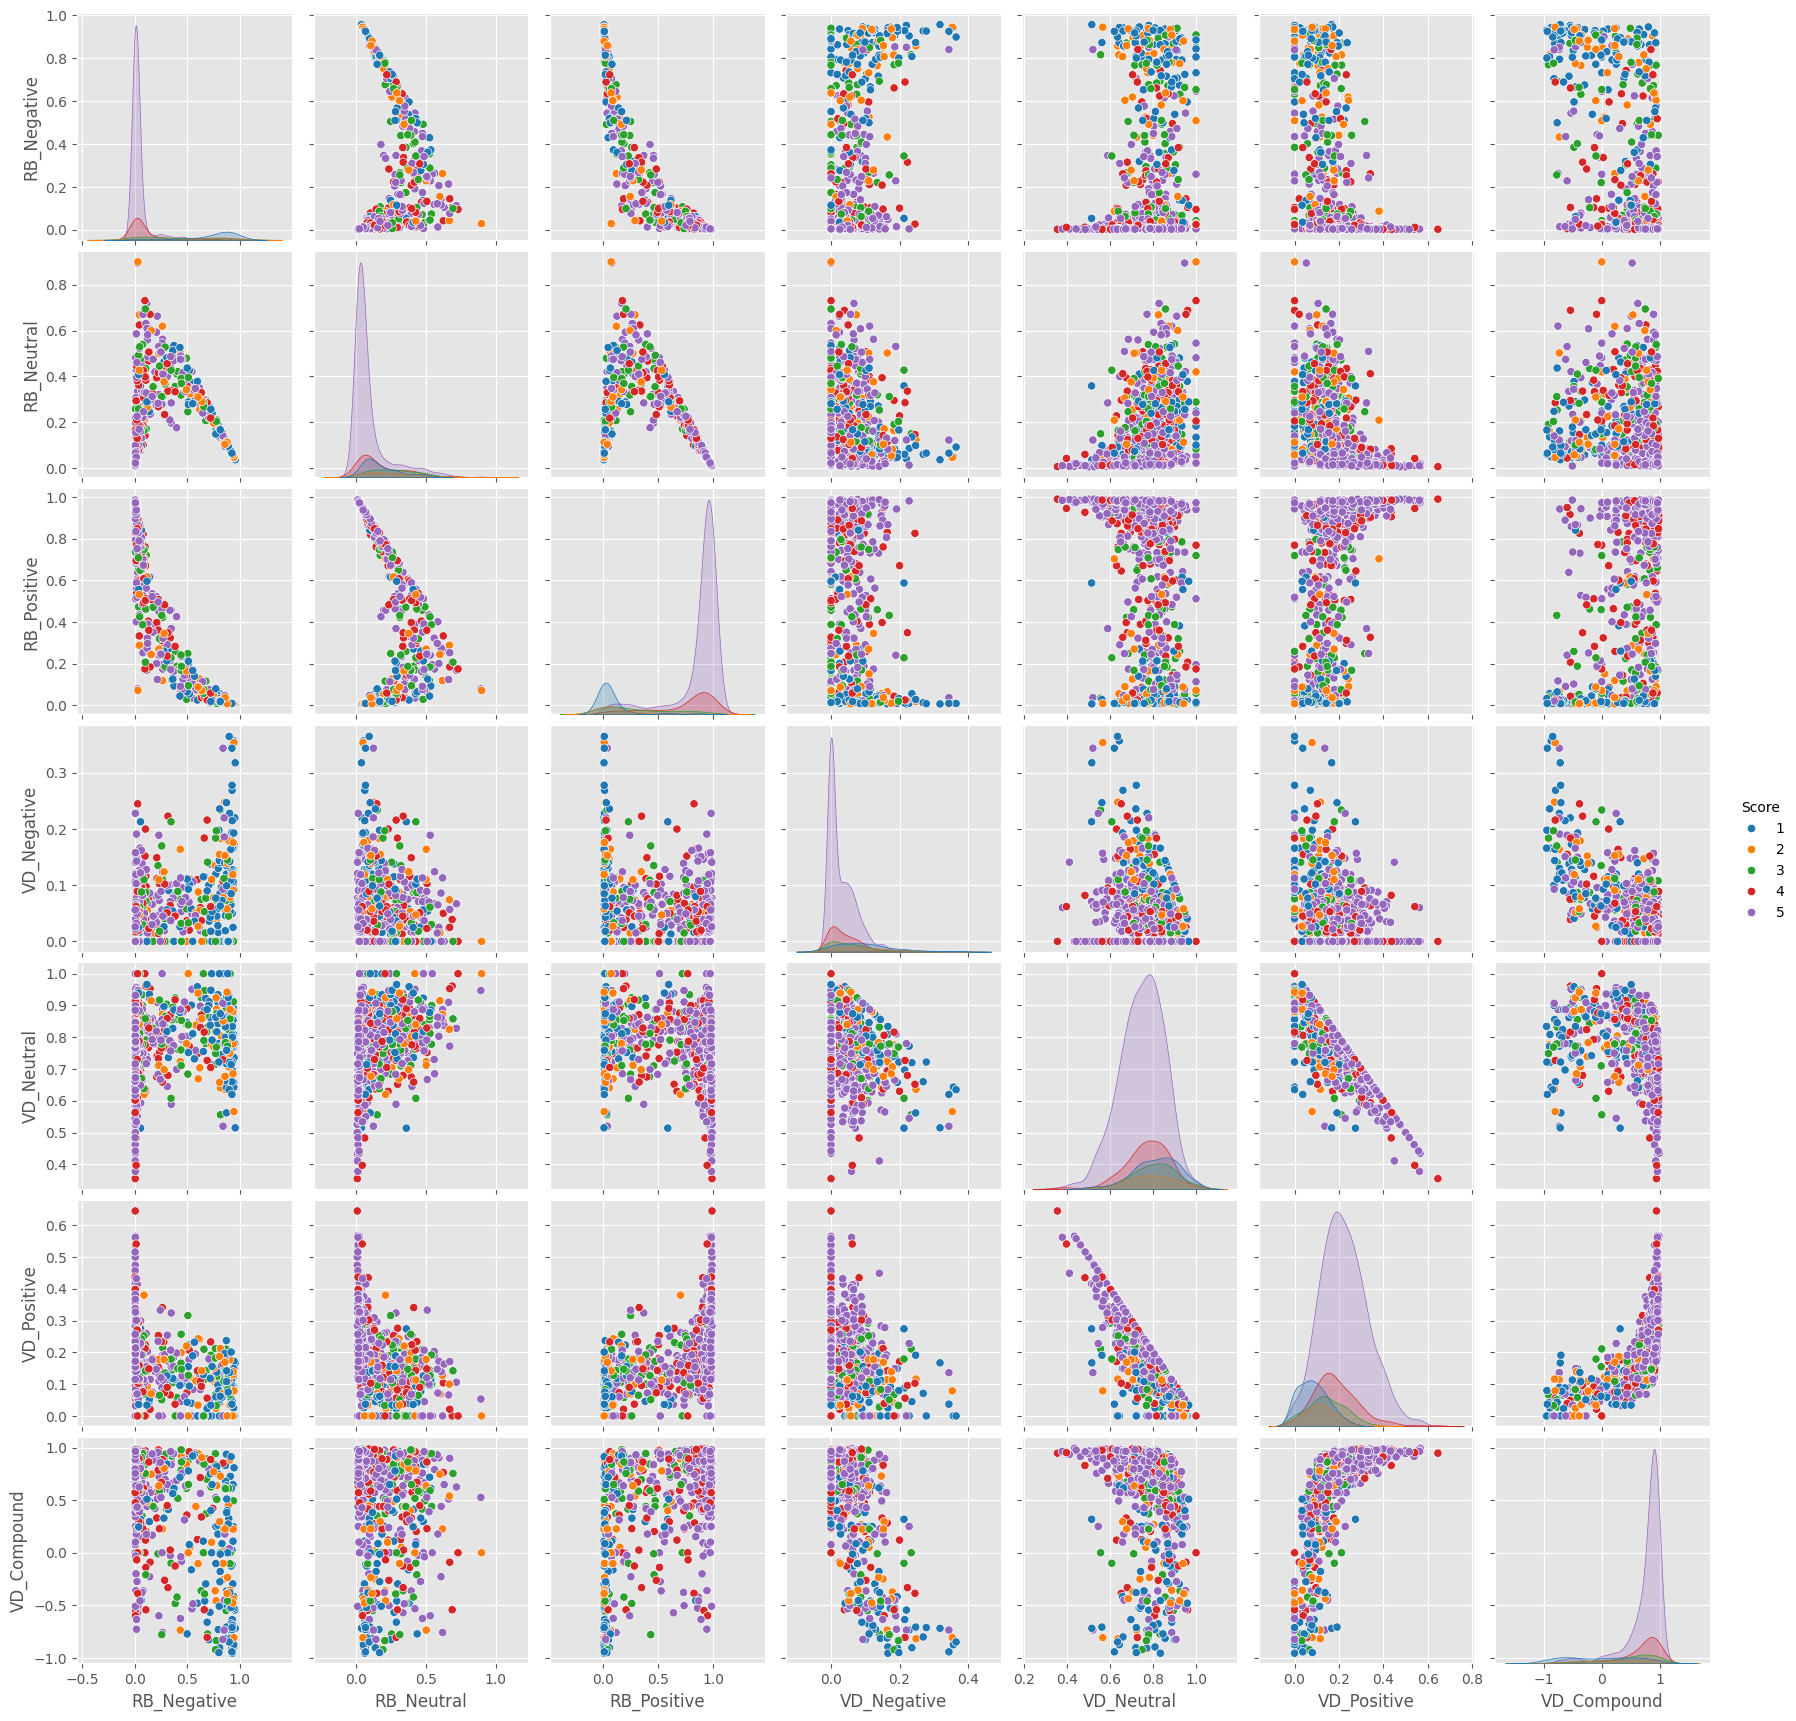

In [171]:
sns.pairplot(data=df_result, vars=['RB_Negative', 'RB_Neutral', 'RB_Positive', 'VD_Negative', 'VD_Neutral', 'VD_Positive', 'VD_Compound'], hue='Score', palette='tab10')